In [1]:
import pandas as pd
from pandas_datareader import data
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import groupby
import re
%matplotlib inline

In [2]:
# mengiterasi semua file senbatsu json ke dalam python
path = r"C:\Users\Compaq\Anaconda3\Twitter\twitter-scraper-master\senbatsu analysis\senbatsu_json"
files = [f for f in glob.glob(path + '*/**.json', recursive=True)]

In [3]:
# menciptakan set untuk variabel baru
senbatsu_set = ["senbatsu_aby", "senbatsu_amel", "senbatsu_aya", "senbatsu_beby", "senbatsu_celine", 
                 "senbatsu_christy", "senbatsu_cinhap", "senbatsu_diani", "senbatsu_eli", "senbatsu_feni", "senbatsu_gracia", 
                 "senbatsu_jinan", "senbatsu_melati", "senbatsu_nadila", "senbatsu_shani", "senbatsu_vivi"]



In [4]:
senbatsu_list = ["senbatsu_aby", "senbatsu_amel", "senbatsu_aya", "senbatsu_beby", "senbatsu_celine", 
                 "senbatsu_christy", "senbatsu_cinhap", "senbatsu_diani", "senbatsu_eli", "senbatsu_feni", "senbatsu_gracia", 
                 "senbatsu_jinan", "senbatsu_melati", "senbatsu_nadila", "senbatsu_shani", "senbatsu_vivi"]



In [5]:
# mengiterasi semua data senbatsu ke dataframe pandas
num = 0
for f in files:
    senbatsu_list[num] = pd.read_json(f,typ='frame',encoding='utf-8')
    num += 1

In [6]:
# mengiterasi semua dataframe senbatsu ke dalam masing-masing variabel
num = 0
for f in senbatsu_list:
    globals()[senbatsu_set[num]] = f
    num += 1

In [7]:
senbatsu_df = [senbatsu_aby, senbatsu_amel, senbatsu_aya, senbatsu_beby, senbatsu_celine, 
                 senbatsu_christy, senbatsu_cinhap, senbatsu_diani, senbatsu_eli, senbatsu_feni, senbatsu_gracia, 
                 senbatsu_jinan, senbatsu_melati, senbatsu_nadila, senbatsu_shani, senbatsu_vivi]

In [8]:
# merapikan dataframe senbatsu
for df in senbatsu_df:
    df.drop(['html','is_retweet','retweet_id','retweeter_userid','retweeter_username','timestamp_epochs','tweet_id','user_id'],axis = 1,inplace=True)
    df['timestamp']=pd.to_datetime(df['timestamp'])
    df.sort_values('timestamp',inplace=True)

In [9]:
for df in senbatsu_df:
    df.drop_duplicates(inplace=True)

In [10]:
#menghitung jumlah kicauan masing-masing senbatsu
senbatsu_count = []
num = 0
for df in senbatsu_df:
    senbatsu_count.append(df['text'].count())
    
    

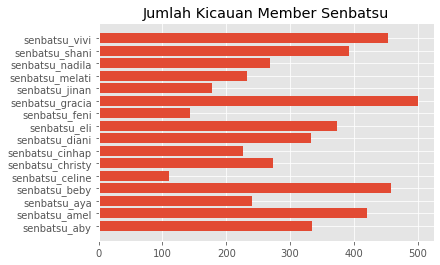

{'senbatsu_aby': 334,
 'senbatsu_amel': 421,
 'senbatsu_aya': 241,
 'senbatsu_beby': 458,
 'senbatsu_celine': 111,
 'senbatsu_christy': 274,
 'senbatsu_cinhap': 227,
 'senbatsu_diani': 333,
 'senbatsu_eli': 373,
 'senbatsu_feni': 143,
 'senbatsu_gracia': 500,
 'senbatsu_jinan': 178,
 'senbatsu_melati': 232,
 'senbatsu_nadila': 268,
 'senbatsu_shani': 392,
 'senbatsu_vivi': 454}

In [11]:
plt.style.use('ggplot')
D = dict(zip(senbatsu_set,senbatsu_count))
ax = plt.subplot()
plt.barh(*zip(*D.items()))
ax.set_title('Jumlah Kicauan Member Senbatsu')
plt.show()
D

In [12]:
#fungsi untuk mengukur rerata kicauan member perharinya
def twit_average(senbatsu):
    total_date = []
    day = datetime.date.day
    for dt in senbatsu['timestamp']:
        total_date.append(dt.day)
    
    key_list = []
    for key in groupby(total_date):
        key_list.append(key)
    
    return len(total_date)/len(key_list)

In [13]:
average_count = []
for df in senbatsu_df:
    average_count.append(twit_average(df))

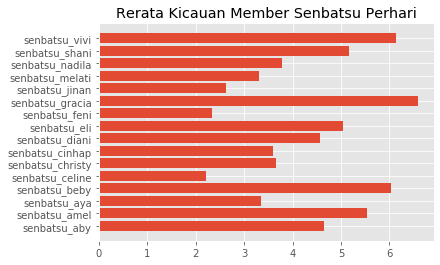

{'senbatsu_aby': 4.638888888888889,
 'senbatsu_amel': 5.5394736842105265,
 'senbatsu_aya': 3.3472222222222223,
 'senbatsu_beby': 6.026315789473684,
 'senbatsu_celine': 2.22,
 'senbatsu_christy': 3.6533333333333333,
 'senbatsu_cinhap': 3.6031746031746033,
 'senbatsu_diani': 4.561643835616438,
 'senbatsu_eli': 5.04054054054054,
 'senbatsu_feni': 2.3442622950819674,
 'senbatsu_gracia': 6.578947368421052,
 'senbatsu_jinan': 2.6176470588235294,
 'senbatsu_melati': 3.3142857142857145,
 'senbatsu_nadila': 3.7746478873239435,
 'senbatsu_shani': 5.157894736842105,
 'senbatsu_vivi': 6.135135135135135}

In [14]:
plt.style.use('ggplot')
A = dict(zip(senbatsu_set,average_count))
ax = plt.subplot()
plt.barh(*zip(*A.items()))
ax.set_title('Rerata Kicauan Member Senbatsu Perhari')
plt.show()
A

In [15]:
senbatsu_vivi['retweets'].sort_values(ascending=False).head(1).values.tolist()

[306]

In [16]:
#melacak kicauan member senbatsu dengan retweet paling banyak
senbatsu_retweet = []
for df in senbatsu_df:
    senbatsu_retweet.append(df['retweets'].sort_values(ascending=False).head(1).to_list())

In [17]:
senbatsu_retweet

[[174],
 [1197],
 [232],
 [875],
 [222],
 [329],
 [328],
 [180],
 [176],
 [286],
 [608],
 [267],
 [265],
 [370],
 [881],
 [306]]

In [18]:
senbatsu_retweet = [174,1197,232,875,222,329,328,180,176,286,608,267,265,370,881,306]

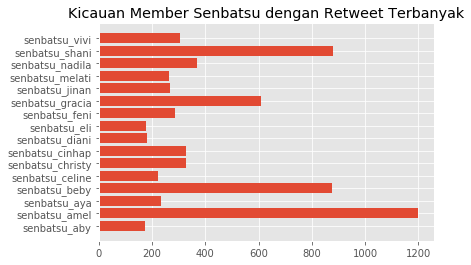

{'senbatsu_aby': 174,
 'senbatsu_amel': 1197,
 'senbatsu_aya': 232,
 'senbatsu_beby': 875,
 'senbatsu_celine': 222,
 'senbatsu_christy': 329,
 'senbatsu_cinhap': 328,
 'senbatsu_diani': 180,
 'senbatsu_eli': 176,
 'senbatsu_feni': 286,
 'senbatsu_gracia': 608,
 'senbatsu_jinan': 267,
 'senbatsu_melati': 265,
 'senbatsu_nadila': 370,
 'senbatsu_shani': 881,
 'senbatsu_vivi': 306}

In [19]:
plt.style.use('ggplot')
C = dict(zip(senbatsu_set,senbatsu_retweet))
ax = plt.subplot()
plt.barh(*zip(*C.items()))
ax.set_title('Kicauan Member Senbatsu dengan Retweet Terbanyak')
plt.show()
C

In [20]:
#kicauan member senbatsu dengan like terbanyak
senbatsu_likes = []
for df in senbatsu_df:
    senbatsu_likes.append(df['likes'].sort_values(ascending=False).head(1).to_list())

In [21]:
senbatsu_likes

[[870],
 [3995],
 [1694],
 [3134],
 [1544],
 [2001],
 [1730],
 [998],
 [1190],
 [1462],
 [2984],
 [1953],
 [2127],
 [1722],
 [4539],
 [2091]]

In [22]:
senbatsu_likes = [870,3995,1694,3134,1544,2001,1730,998,1190,1462,2984,1953,2127,1722,4539,2091]

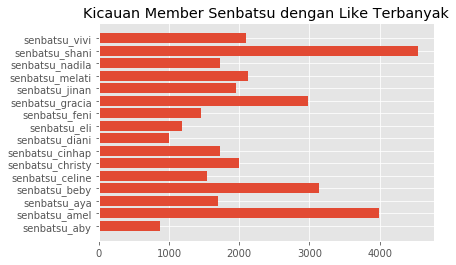

{'senbatsu_aby': 870,
 'senbatsu_amel': 3995,
 'senbatsu_aya': 1694,
 'senbatsu_beby': 3134,
 'senbatsu_celine': 1544,
 'senbatsu_christy': 2001,
 'senbatsu_cinhap': 1730,
 'senbatsu_diani': 998,
 'senbatsu_eli': 1190,
 'senbatsu_feni': 1462,
 'senbatsu_gracia': 2984,
 'senbatsu_jinan': 1953,
 'senbatsu_melati': 2127,
 'senbatsu_nadila': 1722,
 'senbatsu_shani': 4539,
 'senbatsu_vivi': 2091}

In [23]:
plt.style.use('ggplot')
E = dict(zip(senbatsu_set,senbatsu_likes))
ax = plt.subplot()
plt.barh(*zip(*E.items()))
ax.set_title('Kicauan Member Senbatsu dengan Like Terbanyak')
plt.show()
E

In [24]:
#mengukur kicauan member senbatsu dengan reply terbanyak
senbatsu_reply = []
for df in senbatsu_df:
    senbatsu_reply.append(df['replies'].sort_values(ascending=False).head(1).to_list())

In [25]:
senbatsu_reply

[[134],
 [509],
 [304],
 [634],
 [147],
 [270],
 [203],
 [113],
 [255],
 [136],
 [556],
 [316],
 [231],
 [311],
 [593],
 [574]]

In [26]:
senbatsu_reply = [134,509,304,634,147,270,203,113,255,136,556,316,231,311,593,574]

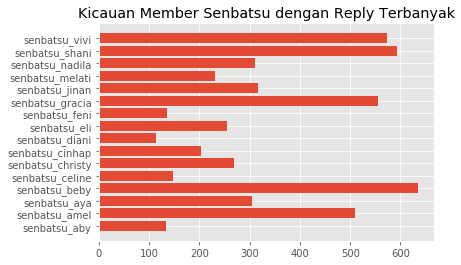

{'senbatsu_aby': 134,
 'senbatsu_amel': 509,
 'senbatsu_aya': 304,
 'senbatsu_beby': 634,
 'senbatsu_celine': 147,
 'senbatsu_christy': 270,
 'senbatsu_cinhap': 203,
 'senbatsu_diani': 113,
 'senbatsu_eli': 255,
 'senbatsu_feni': 136,
 'senbatsu_gracia': 556,
 'senbatsu_jinan': 316,
 'senbatsu_melati': 231,
 'senbatsu_nadila': 311,
 'senbatsu_shani': 593,
 'senbatsu_vivi': 574}

In [27]:
plt.style.use('ggplot')
F = dict(zip(senbatsu_set,senbatsu_reply))
ax = plt.subplot()
plt.barh(*zip(*F.items()))
ax.set_title('Kicauan Member Senbatsu dengan Reply Terbanyak')
plt.show()
F

In [28]:
senbatsu_vivi.sort_values('replies',ascending=False).head(1)

,fullname,likes,replies,retweets,text,timestamp,tweet_url,username
473,Viona Fadrin,1649,574,306,Permisi...pic.twitter.com/3T3lI8NknB,2019-09-15 12:31:06,/F_ViviJKT48/status/1173212644821463040,F_ViviJKT48


In [29]:
senbatsu_beby.sort_values('replies',ascending=False).head(1)

,fullname,likes,replies,retweets,text,timestamp,tweet_url,username
170,Beby Chaesara A,3134,634,640,Selamat pagi dari aku yang pertama kalinya dan...,2019-10-31 00:38:16,/bebyJKT48/status/1189703095938240512,bebyJKT48


In [30]:
# membuat fungsi untuk melacak berapa banyak kata-kata yang keluar dari kicauan member senbatsu
def twit_generator(senbatsu):
    wordcount = []
    for list in senbatsu['text'].to_list():
        for word in list.split():
            wordcount.append(word)
    return len(wordcount)

In [31]:
total_word = []
for df in senbatsu_df:
    total_word.append(twit_generator(df))

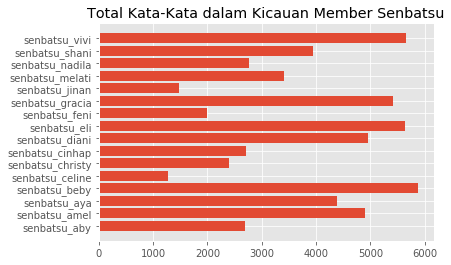

{'senbatsu_aby': 2696,
 'senbatsu_amel': 4899,
 'senbatsu_aya': 4380,
 'senbatsu_beby': 5867,
 'senbatsu_celine': 1275,
 'senbatsu_christy': 2394,
 'senbatsu_cinhap': 2712,
 'senbatsu_diani': 4947,
 'senbatsu_eli': 5627,
 'senbatsu_feni': 1986,
 'senbatsu_gracia': 5409,
 'senbatsu_jinan': 1480,
 'senbatsu_melati': 3409,
 'senbatsu_nadila': 2762,
 'senbatsu_shani': 3945,
 'senbatsu_vivi': 5663}

In [32]:
plt.style.use('ggplot')
G = dict(zip(senbatsu_set,total_word))
ax = plt.subplot()
plt.barh(*zip(*G.items()))
ax.set_title('Total Kata-Kata dalam Kicauan Member Senbatsu')
plt.show()
G

In [33]:
#membuat fungsi untuk mengukur jumlah foto yang diunggah member senbatsu
def pic_count(senbatsu):
    piccount = []
    for list in senbatsu['text'].to_list():
        for word in list.split():
            piccount.append(word)
    pic_generator = []
    for pic in piccount:
        if re.search(".pic.twitter.com.",pic) == None:
            pass
        else:
            pic_generator.append(pic)
    return len(pic_generator)

In [34]:
total_pic = []
for df in senbatsu_df:
    total_pic.append(pic_count(df))

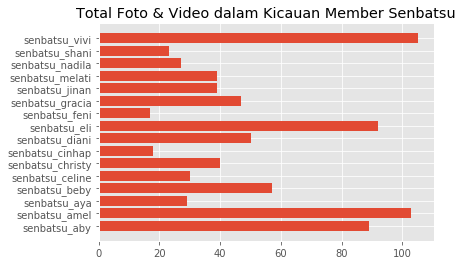

{'senbatsu_aby': 89,
 'senbatsu_amel': 103,
 'senbatsu_aya': 29,
 'senbatsu_beby': 57,
 'senbatsu_celine': 30,
 'senbatsu_christy': 40,
 'senbatsu_cinhap': 18,
 'senbatsu_diani': 50,
 'senbatsu_eli': 92,
 'senbatsu_feni': 17,
 'senbatsu_gracia': 47,
 'senbatsu_jinan': 39,
 'senbatsu_melati': 39,
 'senbatsu_nadila': 27,
 'senbatsu_shani': 23,
 'senbatsu_vivi': 105}

In [35]:
plt.style.use('ggplot')
H = dict(zip(senbatsu_set,total_pic))
ax = plt.subplot()
plt.barh(*zip(*H.items()))
ax.set_title('Total Foto & Video dalam Kicauan Member Senbatsu')
plt.show()
H

In [36]:
# fungsi untuk memeriksa valid atau tidaknya fungsi di atas
def pic_count1(senbatsu):
    piccount = []
    for list in senbatsu['text'].to_list():
        for word in list.split():
            piccount.append(word)
    pic_generator = []
    for pic in piccount:
        if re.search(".pic.twitter.com.",pic) == None:
            pass
        else:
            pic_generator.append(pic)
    return pic_generator

In [37]:
pic_count1(senbatsu_vivi)

['Permisi...pic.twitter.com/3T3lI8NknB',
 'dahpic.twitter.com/VZQGNei0Ed',
 'tandinganpic.twitter.com/AecHBJ223d',
 'emaknypic.twitter.com/1xGjHhANDU',
 'all~pic.twitter.com/aiNszSHHr3',
 'introvertpic.twitter.com/6rX52PCnJ8',
 'adohhhhhhpic.twitter.com/f6OwYAkGZT',
 'dahpic.twitter.com/y3Ux8pKhin',
 'latihaaannpic.twitter.com/igc5b8Zrnk',
 'dmpic.twitter.com/HWekSskOFf',
 'bntrpic.twitter.com/6OVPu64EiU',
 'huhuypic.twitter.com/Ur3ZWkFyrr',
 '@Cres_Krispic.twitter.com/DHOXP3dWKH',
 'goodnitepic.twitter.com/S4i3vxvzgt',
 'yaa!!!pic.twitter.com/TywiBzNTTo',
 'banget!pic.twitter.com/pPWUXfEUj1',
 'lupic.twitter.com/ACE92Gq31X',
 'rosepic.twitter.com/HV2loABVWO',
 'kokpic.twitter.com/DXSk9DsiU4',
 'soalnyaaapic.twitter.com/dvyQdaSEx5',
 'braypic.twitter.com/IO4AXFaHMh',
 'yaaapic.twitter.com/C8JLUgoJ7w',
 '-_-pic.twitter.com/SDZcVQQHHK',
 'nyaapic.twitter.com/f5vhYfqTMO',
 'teruspic.twitter.com/ASlD3W2J8X',
 'mompic.twitter.com/6v0rMwralK',
 'pulangnyapic.twitter.com/g7W7OuiUiQ',
 'Thanky

In [38]:
#mengukur jumlah followers masing-masing member senbatsu
jumlah_followers = {"senbatsu_aby": 58206, "senbatsu_amel": 63480, "senbatsu_aya": 63373, "senbatsu_beby": 563218, "senbatsu_celine": 78750, 
                 "senbatsu_christy": 28881, "senbatsu_cinhap": 128477, "senbatsu_diani": 49264, "senbatsu_eli": 24004, "senbatsu_feni": 172963, "senbatsu_gracia": 219351, 
                 "senbatsu_jinan": 78916, "senbatsu_melati": 78295, "senbatsu_nadila": 410636, "senbatsu_shani": 361937, "senbatsu_vivi": 26629}



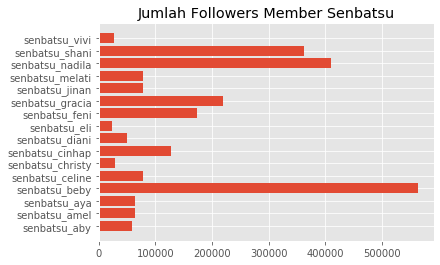

{'senbatsu_aby': 58206,
 'senbatsu_amel': 63480,
 'senbatsu_aya': 63373,
 'senbatsu_beby': 563218,
 'senbatsu_celine': 78750,
 'senbatsu_christy': 28881,
 'senbatsu_cinhap': 128477,
 'senbatsu_diani': 49264,
 'senbatsu_eli': 24004,
 'senbatsu_feni': 172963,
 'senbatsu_gracia': 219351,
 'senbatsu_jinan': 78916,
 'senbatsu_melati': 78295,
 'senbatsu_nadila': 410636,
 'senbatsu_shani': 361937,
 'senbatsu_vivi': 26629}

In [39]:
plt.style.use('ggplot')
ax = plt.subplot()
plt.barh(*zip(*jumlah_followers.items()))
ax.set_title('Jumlah Followers Member Senbatsu')
plt.show()
jumlah_followers

In [40]:
sum(senbatsu_count)

4939

In [41]:
senbatsu_count

[334,
 421,
 241,
 458,
 111,
 274,
 227,
 333,
 373,
 143,
 500,
 178,
 232,
 268,
 392,
 454]

In [42]:
senbatsu_beby.set_index('text').sort_values('replies',ascending=False).head(1)

,fullname,likes,replies,retweets,timestamp,tweet_url,username
text,,,,,,,
Selamat pagi dari aku yang pertama kalinya dandan seperti ini.\n\n#CongraduationBebyJKT48pic.twitter.com/mr4UjoZMvX,Beby Chaesara A,3134,634,640,2019-10-31 00:38:16,/bebyJKT48/status/1189703095938240512,bebyJKT48


In [43]:
# membuat fungsi untuk mengukur total reply
def total_reply(senbatsu):
    return sum(senbatsu['replies'].to_list())

In [44]:
totalreply = []
for df in senbatsu_df:
    totalreply.append(total_reply(df))

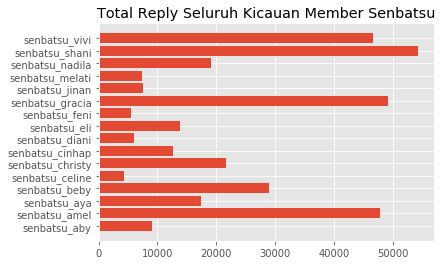

{'senbatsu_aby': 9028,
 'senbatsu_amel': 47893,
 'senbatsu_aya': 17407,
 'senbatsu_beby': 28970,
 'senbatsu_celine': 4387,
 'senbatsu_christy': 21671,
 'senbatsu_cinhap': 12610,
 'senbatsu_diani': 6007,
 'senbatsu_eli': 13824,
 'senbatsu_feni': 5467,
 'senbatsu_gracia': 49132,
 'senbatsu_jinan': 7460,
 'senbatsu_melati': 7299,
 'senbatsu_nadila': 19109,
 'senbatsu_shani': 54240,
 'senbatsu_vivi': 46585}

In [45]:
plt.style.use('ggplot')
I = dict(zip(senbatsu_set,totalreply))
ax = plt.subplot()
plt.barh(*zip(*I.items()))
ax.set_title('Total Reply Seluruh Kicauan Member Senbatsu')
plt.show()
I

In [46]:
# membuat fungsi untuk mengukur total likes
def total_likes(senbatsu):
    return sum(senbatsu['likes'].to_list())

totallikes = []
for df in senbatsu_df:
    totallikes.append(total_likes(df))

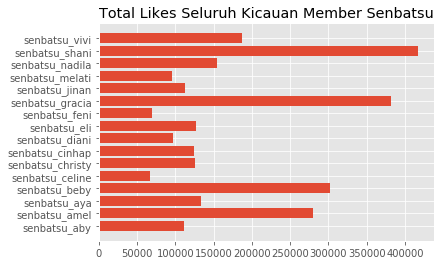

{'senbatsu_aby': 111392,
 'senbatsu_amel': 279958,
 'senbatsu_aya': 133068,
 'senbatsu_beby': 301526,
 'senbatsu_celine': 67347,
 'senbatsu_christy': 126354,
 'senbatsu_cinhap': 125151,
 'senbatsu_diani': 97718,
 'senbatsu_eli': 126687,
 'senbatsu_feni': 69402,
 'senbatsu_gracia': 381809,
 'senbatsu_jinan': 112170,
 'senbatsu_melati': 96062,
 'senbatsu_nadila': 154899,
 'senbatsu_shani': 416563,
 'senbatsu_vivi': 186747}

In [47]:
plt.style.use('ggplot')
J = dict(zip(senbatsu_set,totallikes))
ax = plt.subplot()
plt.barh(*zip(*J.items()))
ax.set_title('Total Likes Seluruh Kicauan Member Senbatsu')
plt.show()
J

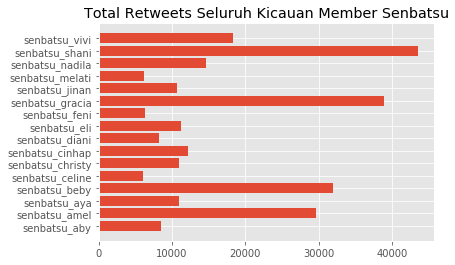

{'senbatsu_aby': 8539,
 'senbatsu_amel': 29603,
 'senbatsu_aya': 10911,
 'senbatsu_beby': 32008,
 'senbatsu_celine': 6061,
 'senbatsu_christy': 10966,
 'senbatsu_cinhap': 12203,
 'senbatsu_diani': 8180,
 'senbatsu_eli': 11161,
 'senbatsu_feni': 6288,
 'senbatsu_gracia': 38858,
 'senbatsu_jinan': 10678,
 'senbatsu_melati': 6227,
 'senbatsu_nadila': 14675,
 'senbatsu_shani': 43477,
 'senbatsu_vivi': 18349}

In [48]:
# membuat fungsi untuk mengukur total retweet
def total_retweets(senbatsu):
    return sum(senbatsu['retweets'].to_list())

totalretweets = []
for df in senbatsu_df:
    totalretweets.append(total_retweets(df))

#membuat figur dari total retweet tersebut
plt.style.use('ggplot')
K = dict(zip(senbatsu_set,totalretweets))
ax = plt.subplot()
plt.barh(*zip(*K.items()))
ax.set_title('Total Retweets Seluruh Kicauan Member Senbatsu')
plt.show()
K

In [49]:
# mengukur rerata likes tiap kicauan member senbatsu
totalretweet = sum(senbatsu_amel['retweets'].to_list())
totalretweet/(senbatsu_aby['text'].count())

88.63173652694611

In [50]:
# membuat fungsi untuk mengukur rerata likes tiap kicauan member senbatsu
def average_likes(senbatsu):
    averagelikes = sum(senbatsu['likes'].to_list())
    return averagelikes/(senbatsu['text'].count())

# mengukur rerata likes tiap kicauan dari semua member senbatsu
list_average_likes = []
for df in senbatsu_df:
    list_average_likes.append(average_likes(df))

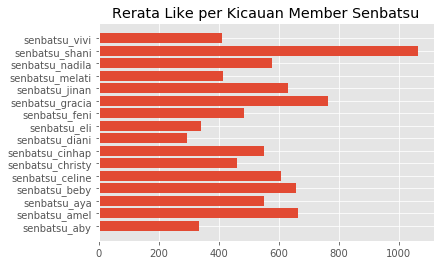

{'senbatsu_aby': 333.50898203592817,
 'senbatsu_amel': 664.9833729216152,
 'senbatsu_aya': 552.149377593361,
 'senbatsu_beby': 658.353711790393,
 'senbatsu_celine': 606.7297297297297,
 'senbatsu_christy': 461.1459854014599,
 'senbatsu_cinhap': 551.3259911894273,
 'senbatsu_diani': 293.4474474474475,
 'senbatsu_eli': 339.64343163538877,
 'senbatsu_feni': 485.3286713286713,
 'senbatsu_gracia': 763.618,
 'senbatsu_jinan': 630.1685393258427,
 'senbatsu_melati': 414.0603448275862,
 'senbatsu_nadila': 577.9813432835821,
 'senbatsu_shani': 1062.6607142857142,
 'senbatsu_vivi': 411.33700440528634}

In [51]:
plt.style.use('ggplot')
L = dict(zip(senbatsu_set,list_average_likes))
ax = plt.subplot()
plt.barh(*zip(*L.items()))
ax.set_title('Rerata Like per Kicauan Member Senbatsu')
plt.show()
L

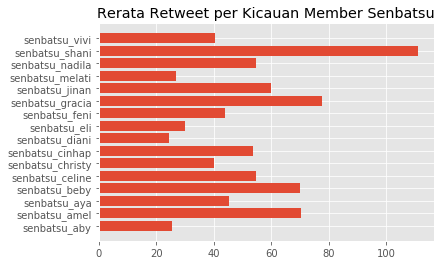

{'senbatsu_aby': 25.565868263473053,
 'senbatsu_amel': 70.31591448931117,
 'senbatsu_aya': 45.273858921161825,
 'senbatsu_beby': 69.88646288209607,
 'senbatsu_celine': 54.6036036036036,
 'senbatsu_christy': 40.02189781021898,
 'senbatsu_cinhap': 53.757709251101325,
 'senbatsu_diani': 24.564564564564563,
 'senbatsu_eli': 29.92225201072386,
 'senbatsu_feni': 43.97202797202797,
 'senbatsu_gracia': 77.716,
 'senbatsu_jinan': 59.98876404494382,
 'senbatsu_melati': 26.84051724137931,
 'senbatsu_nadila': 54.757462686567166,
 'senbatsu_shani': 110.91071428571429,
 'senbatsu_vivi': 40.41629955947136}

In [52]:
# membuat fungsi untuk mengukur rerata retweets tiap kicauan member senbatsu
def average_retweets(senbatsu):
    averageretweets = sum(senbatsu['retweets'].to_list())
    return averageretweets/(senbatsu['text'].count())

# mengukur rerata retweets tiap kicauan dari semua member senbatsu
list_average_retweets = []
for df in senbatsu_df:
    list_average_retweets.append(average_retweets(df))

plt.style.use('ggplot')
M = dict(zip(senbatsu_set,list_average_retweets))
ax = plt.subplot()
plt.barh(*zip(*M.items()))
ax.set_title('Rerata Retweet per Kicauan Member Senbatsu')
plt.show()
M

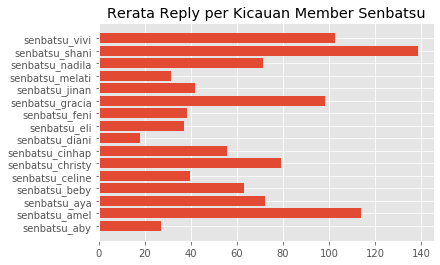

{'senbatsu_aby': 27.02994011976048,
 'senbatsu_amel': 113.76009501187649,
 'senbatsu_aya': 72.22821576763485,
 'senbatsu_beby': 63.2532751091703,
 'senbatsu_celine': 39.52252252252252,
 'senbatsu_christy': 79.0912408759124,
 'senbatsu_cinhap': 55.55066079295154,
 'senbatsu_diani': 18.03903903903904,
 'senbatsu_eli': 37.061662198391424,
 'senbatsu_feni': 38.23076923076923,
 'senbatsu_gracia': 98.264,
 'senbatsu_jinan': 41.91011235955056,
 'senbatsu_melati': 31.461206896551722,
 'senbatsu_nadila': 71.30223880597015,
 'senbatsu_shani': 138.3673469387755,
 'senbatsu_vivi': 102.6101321585903}

In [53]:
# membuat fungsi untuk mengukur rerata replies tiap kicauan member senbatsu
def average_replies(senbatsu):
    averagereplies = sum(senbatsu['replies'].to_list())
    return averagereplies/(senbatsu['text'].count())

# mengukur rerata replies tiap kicauan dari semua member senbatsu
list_average_replies = []
for df in senbatsu_df:
    list_average_replies.append(average_replies(df))

plt.style.use('ggplot')
M = dict(zip(senbatsu_set,list_average_replies))
ax = plt.subplot()
plt.barh(*zip(*M.items()))
ax.set_title('Rerata Reply per Kicauan Member Senbatsu')
plt.show()
M

In [54]:
senbatsu_amel.set_index('text').sort_values('retweets', ascending=False).head(1)

,fullname,likes,replies,retweets,timestamp,tweet_url,username
text,,,,,,,
#IzinkanAku joget entah apa yang merasukimu~pic.twitter.com/Q2ZtrzsZxu,Riska Amelia Putri,3995,509,1197,2019-10-02 06:03:02,/R_AmelJKT48/status/1179275579994120192,R_AmelJKT48
